## 🎓 Student Performance Prediction using Machine Learning
This project aims to predict students' final grades using simple machine learning techniques in Python. We use a dataset from the UCI Machine Learning Repository.

## 📥 Load the Dataset

In [1]:
import pandas as pd

# Load the dataset from the CSV file with semicolon separators
df = pd.read_csv('/content/student-mat.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 🔍 Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


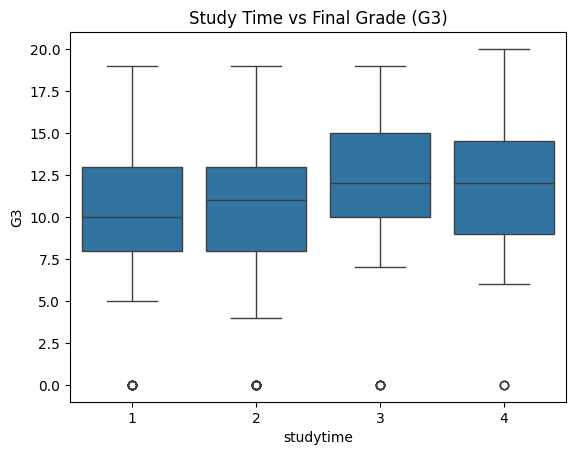

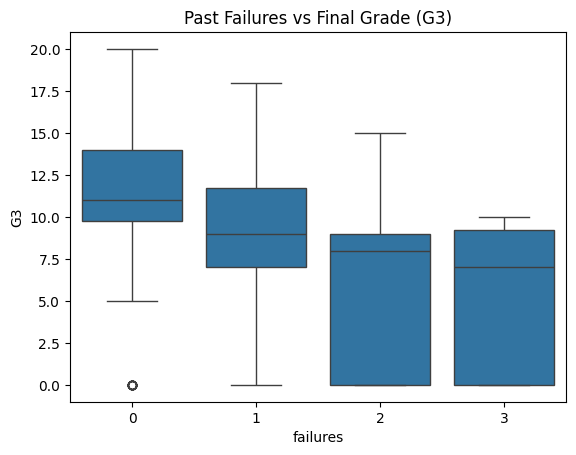

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot study time vs G3
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade (G3)")
plt.show()

# Plot failures vs G3
sns.boxplot(x='failures', y='G3', data=df)
plt.title("Past Failures vs Final Grade (G3)")
plt.show()

## 🧠 Feature Selection

In [7]:
# Selecting features (X) and target (y)
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]  # input features
y = df['G3']  # target variable


## ✂️ Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Train the Model

In [9]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model with training data
model.fit(X_train, y_train)


LinearRegression()

## 📈 Predictions

In [10]:
# Predict final grades for the test data
y_pred = model.predict(X_test)


## 📊 Model Evaluation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.34
RMSE: 2.11
R² Score: 0.78


In [12]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.34
RMSE: 2.11
R² Score: 0.78


## 📉 Actual vs Predicted Final Grades

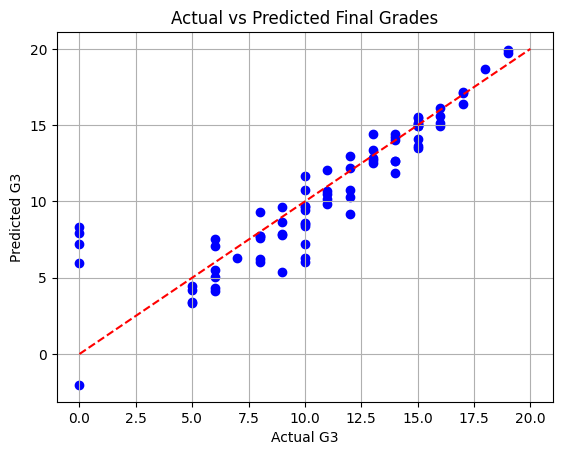

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted grades
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 20], [0, 20], '--r')  # line for perfect prediction
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grades')
plt.grid(True)
plt.show()
